In [147]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [148]:
titanic = pd.read_csv("titanic.csv")
titanic 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [149]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [150]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [151]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

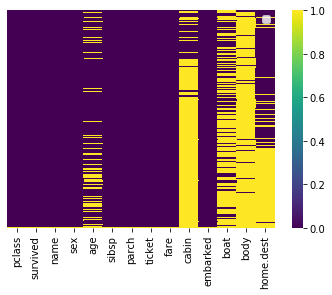

In [152]:
sns.heatmap(titanic.isnull(),cmap='viridis',cbar=True,yticklabels=False)
plt.legend("The missing data in titanic") # So we have here missing values at the columns of age. cabin, boat. body and
# home.dest 

In [153]:
titanic["cabin"].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
F33                4
                  ..
F                  1
E40                1
E58                1
D38                1
B26                1
Name: cabin, Length: 186, dtype: int64

## Data preprocessing and cleaning 

In [154]:
titanic.dropna(subset=["pclass","survived","name","sex","sibsp","parch","ticket","fare","embarked"],inplace =True)
# I dropped the missing values in those subsets as the are only missing at mex 3 values 

In [155]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        0
boat          822
body         1186
home.dest     562
dtype: int64

In [156]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1306.000000,1306.000000,1043.000000,1306.00000,1306.000000,1306.000000,120.000000
mean,2.296325,0.381317,29.813199,0.50000,0.385911,33.223956,159.975000
std,0.837037,0.485896,14.366261,1.04258,0.866357,51.765986,97.672103
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.00000,0.000000,7.895800,71.500000
50%,3.000000,0.000000,28.000000,0.00000,0.000000,14.454200,154.000000
75%,3.000000,1.000000,39.000000,1.00000,0.000000,31.275000,255.250000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200,328.000000


In [157]:
fill = {"age":titanic["age"].median(),"body":titanic["body"].median()}
titanic.fillna(fill,inplace=True) # here I am replacing the age and body variables by their medians as the medians are 
# more closer to the actual values and the median is more robust than the mean 

In [158]:
titanic["pclass"] = titanic["pclass"].astype(int)  
titanic["survived"] = titanic["survived"].astype(int)
titanic["sibsp"] = titanic["sibsp"].astype(int)
titanic["parch"] = titanic["parch"].astype(int)
titanic["age"] = titanic["age"].astype(int)
titanic["body"] = titanic["body"].astype(int)
# I replaced those variables into integer numbers as the logic behind those variables is integer since 
# we cannot have float age, float number of survived people and dead . 


In [159]:
titanic["boat"].value_counts()

13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
11         25
9          25
16         23
7          23
8          23
D          20
12         19
6          18
2          13
A          11
B           9
1           5
C D         2
13 15       2
5 7         2
13 15 B     1
5 9         1
8 10        1
15 16       1
Name: boat, dtype: int64

In [160]:
titanic["boat"].replace({"C":np.NaN,"D":np.NaN,"A":np.NaN,"B":np.NaN,"13 15":np.NaN,"C D":np.NaN,"5 7":np.NaN,
                     "5 9":np.NaN,"13 15 B":np.NaN,"8 10":np.NaN,"15 16":np.NaN},inplace=True) 
# I am replacing upnormal data by the nans so I will be capable of dropping them later on 


In [161]:
titanic["cabin"].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', 'C105',


In [162]:
titanic["cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
C78                4
                  ..
F                  1
E40                1
E58                1
D38                1
B26                1
Name: cabin, Length: 185, dtype: int64

In [163]:
titanic["cabin"].replace({'C22 C26' :np.NaN,'C62 C64':np.NaN,'B58 B60':np.NaN,'T':np.NaN,'B51 B53 B55':np.NaN,
                       'B96 B98':np.NaN,'D10 D12':np.NaN,'B82 B84':np.NaN,'C23 C25 C27':np.NaN,'B52 B54 B56':np.NaN,
                       'B57 B59 B63 B66':np.NaN,'E39 E41':np.NaN,'F G63':np.NaN,'F E57':np.NaN,
                       'F E46':np.NaN, 'F G73':np.NaN,'F E69': np.NaN,"D":np.NaN,"C55 C57":np.NaN},inplace=True)
# I am dropping also here the unusal cabins 

In [164]:
#titanic["boat"].mode()
titanic["boat"] = titanic["boat"].fillna("13")
#data["cabin"].mode()
titanic["cabin"]= titanic["cabin"].fillna("G6")
#data["home.dest"].mode()
titanic["home.dest"] = titanic["home.dest"].fillna("New York, NY")

In [165]:
titanic.isnull().sum()


pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [166]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000,1306.000000
mean,2.296325,0.381317,29.429556,0.50000,0.385911,33.223956,154.549005
std,0.837037,0.485896,12.870234,1.04258,0.866357,51.765986,29.544840
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.00000,0.000000,7.895800,154.000000
50%,3.000000,0.000000,28.000000,0.00000,0.000000,14.454200,154.000000
75%,3.000000,1.000000,35.000000,1.00000,0.000000,31.275000,154.000000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200,328.000000


In [167]:
titanic["sex"].value_counts()

male      842
female    464
Name: sex, dtype: int64

## Label encoding 

In [168]:
le = LabelEncoder()

In [169]:
sex_le = LabelEncoder()
embarked_le = LabelEncoder()

In [170]:
titanic["sex"]= sex_le.fit_transform(titanic["sex"])

In [171]:
titanic["embarked"] = embarked_le.fit_transform(titanic["embarked"])

In [172]:
titanic["sex"].value_counts()

1    842
0    464
Name: sex, dtype: int64

## Data Visulization 

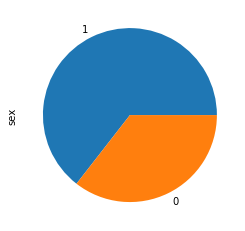

In [173]:
titanic["sex"].value_counts().plot(kind="pie")
plt.show() # To have a visualization before the label encoding 

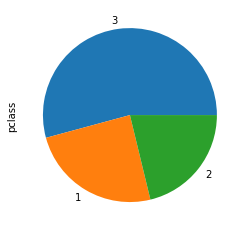

In [174]:
titanic["pclass"].value_counts().plot(kind="pie")
plt.show() # To have a visualization before the label encoding

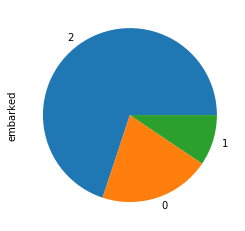

In [175]:
titanic["embarked"].value_counts().plot(kind="pie")
plt.show() # To have a visualization before the label encoding

In [176]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1306 non-null int64
survived     1306 non-null int64
name         1306 non-null object
sex          1306 non-null int64
age          1306 non-null int64
sibsp        1306 non-null int64
parch        1306 non-null int64
ticket       1306 non-null object
fare         1306 non-null float64
cabin        1306 non-null object
embarked     1306 non-null int64
boat         1306 non-null object
body         1306 non-null int64
home.dest    1306 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 153.0+ KB


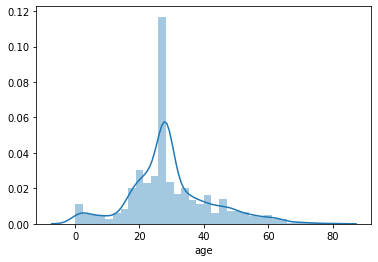

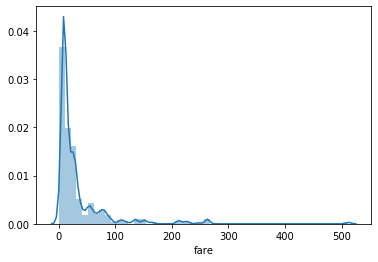

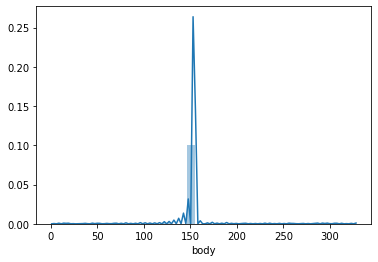

In [177]:
list0 = ["age","fare","body"]
for y in list0:
    sns.distplot(titanic[y])
    plt.show()

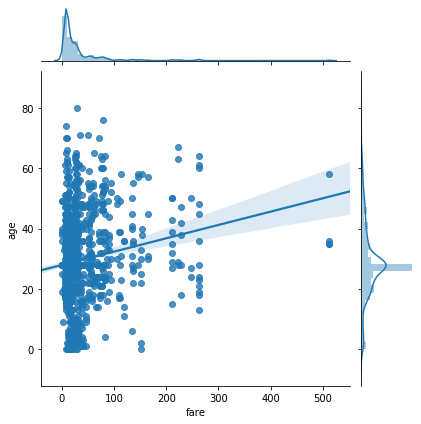

In [178]:
sns.jointplot(x='fare',y='age',data=titanic,kind="reg")

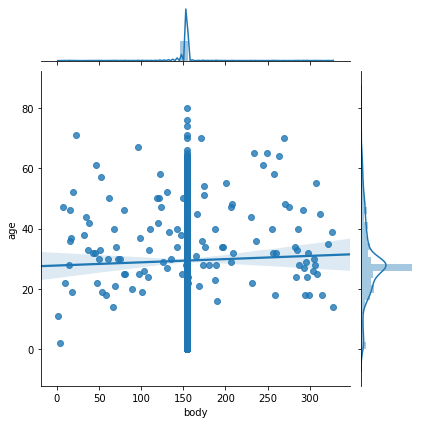

In [179]:
sns.jointplot(x='body',y='age',data=titanic,kind="reg")

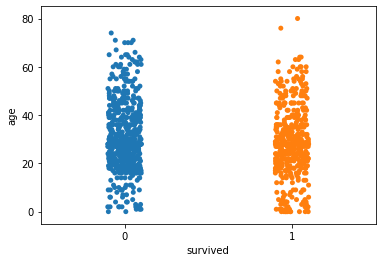

In [180]:
sns.stripplot(x="survived", y="age", data=titanic, jitter=True)

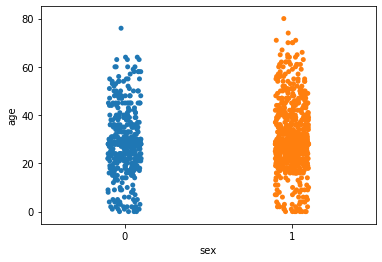

In [181]:
sns.stripplot(x="sex", y="age", data=titanic, jitter=True)

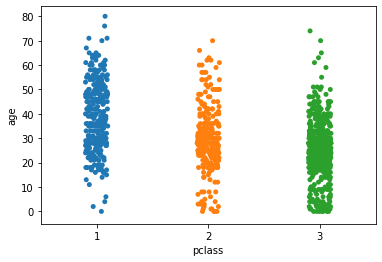

In [182]:
sns.stripplot(x="pclass", y="age", data=titanic, jitter=True)

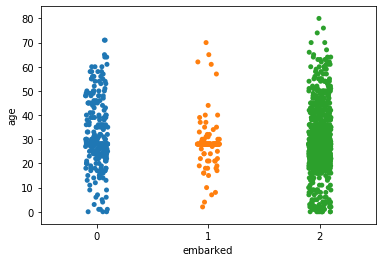

In [183]:
sns.stripplot(x="embarked", y="age", data=titanic, jitter=True)

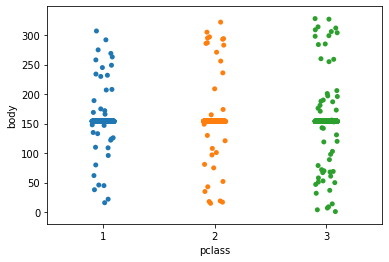

In [184]:
sns.stripplot(x="pclass", y="body", data=titanic, jitter=True)

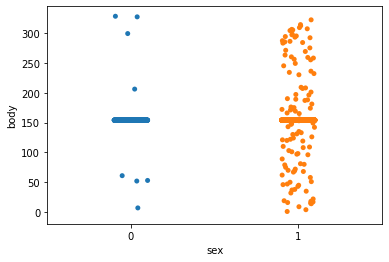

In [137]:
sns.stripplot(x="sex", y="body", data=titanic, jitter=True)

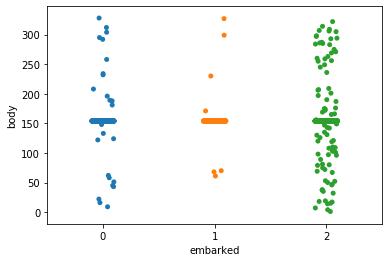

In [138]:
sns.stripplot(x="embarked", y="body", data=titanic, jitter=True)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


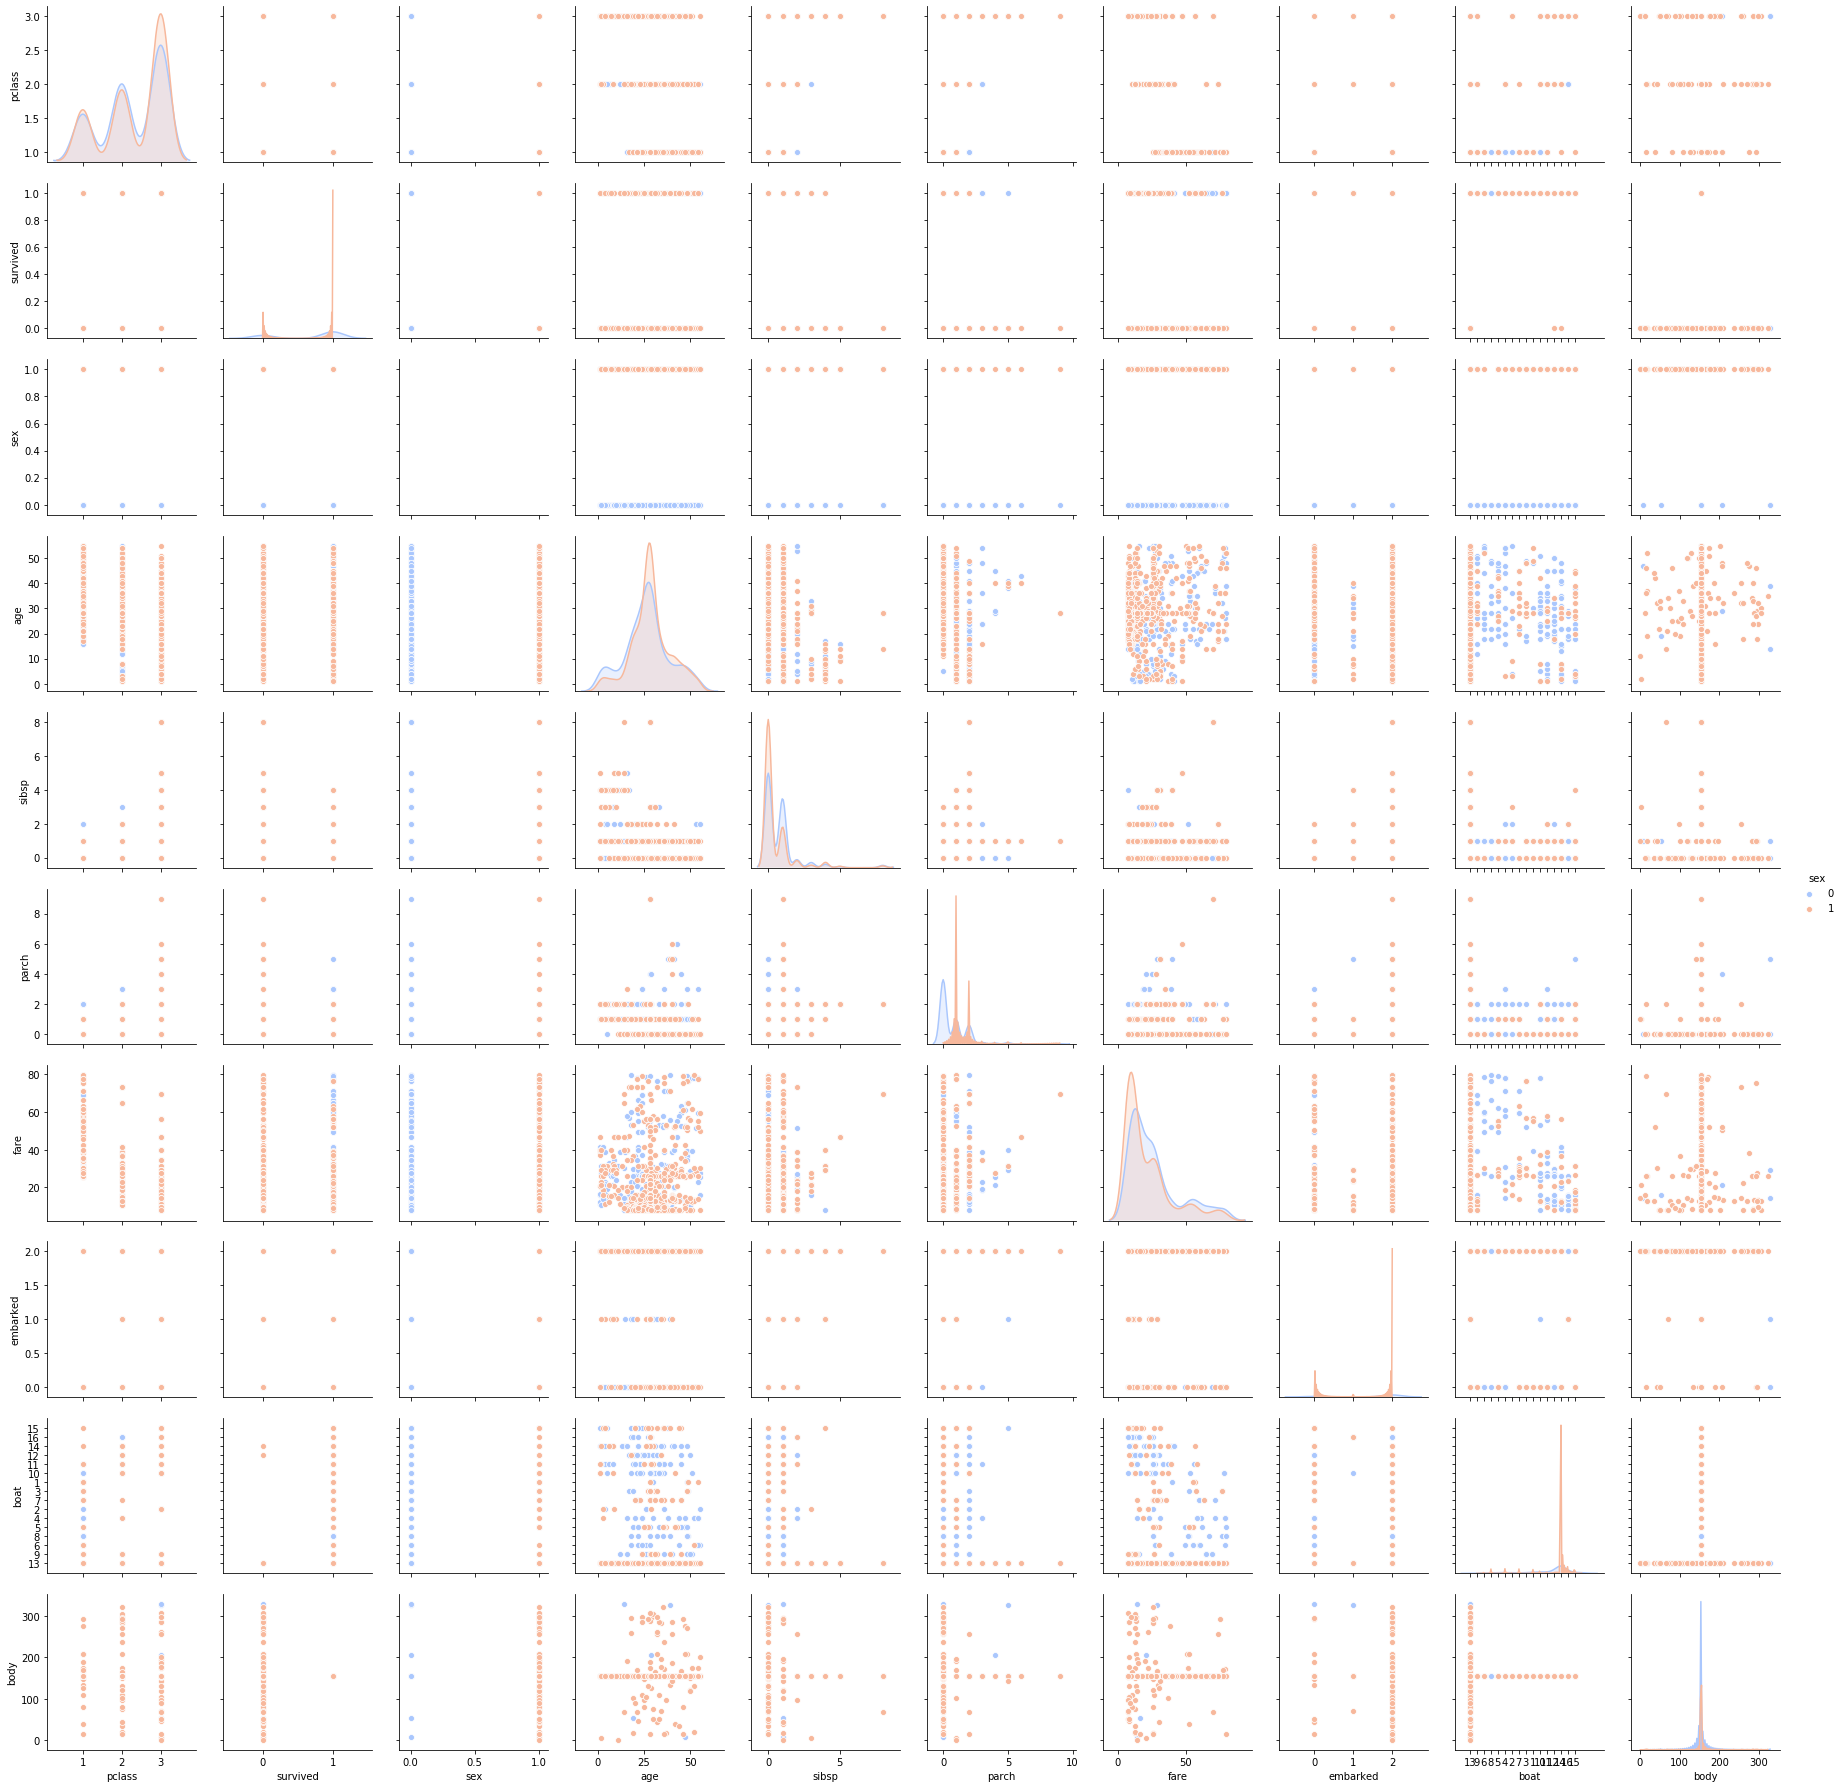

In [41]:
sns.pairplot(titanic,hue='sex',palette='coolwarm')

Text(0.5, 1.0, 'The survival rate based on gender')

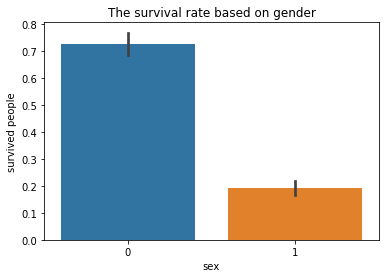

In [185]:
sns.barplot(x="sex", y="survived",data=titanic)
plt.ylabel("survived people")
plt.title("The survival rate based on gender")
# the data visulization asserts that female survived more than men as males passengers 
# were outnumbering the females. However, females survived more as in titanic, people were tending 
#to rescure women and children in the first place 

Text(0.5, 1.0, 'The survival rate based on classes')

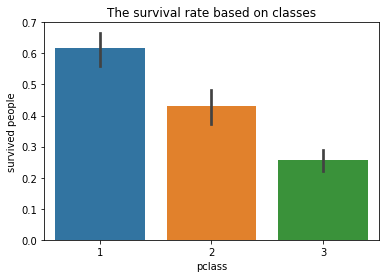

In [186]:
sns.barplot(x="pclass", y="survived",data=titanic)
plt.ylabel("survived people")
plt.title("The survival rate based on classes")
# comparing the first class (1) with the second (2) and lower class (3), in titanic they start rescuing the first class 
# That's why the survival rate  from the first class is the highest among the first class (1)

Text(0.5, 1.0, 'The survival rate based on the embarked varaible')

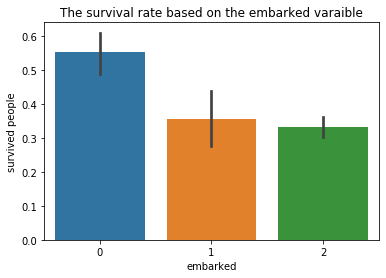

In [187]:
sns.barplot(x="embarked", y="survived",data=titanic)
plt.ylabel("survived people")
plt.title("The survival rate based on the embarked varaible")


Text(0.5, 1.0, 'The survival rate based on class and gender')

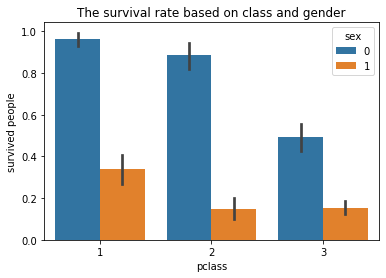

In [188]:
sns.barplot(x="pclass", y="survived", hue="sex", data=titanic)
plt.ylabel("survived people")
plt.title("The survival rate based on class and gender")


Text(0.5, 1.0, 'The death rate based on class and gender')

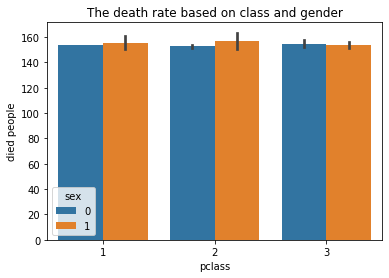

In [189]:
sns.barplot(x="pclass", y="body", hue="sex", data=titanic)
plt.ylabel("died people")
plt.title("The death rate based on class and gender")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

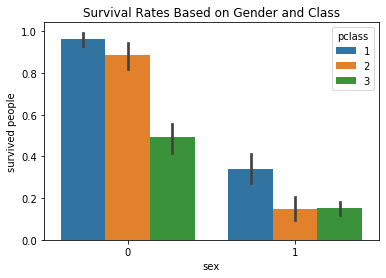

In [190]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic)
plt.ylabel("survived people")
plt.title("Survival Rates Based on Gender and Class")
# generally speaking, females survived more than males across all the level classes 

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

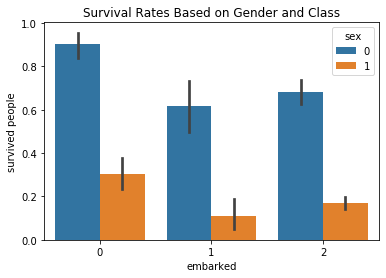

In [191]:
sns.barplot(x="embarked", y="survived", hue="sex", data=titanic)
plt.ylabel("survived people")
plt.title("Survival Rates Based on Gender and Class")

## Detecting outliers and removing them : 

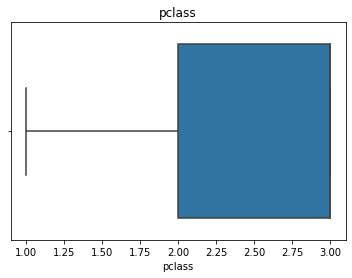

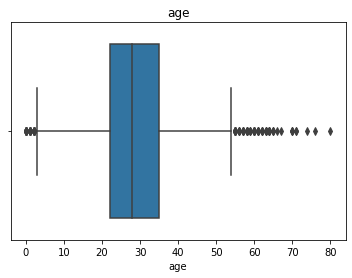

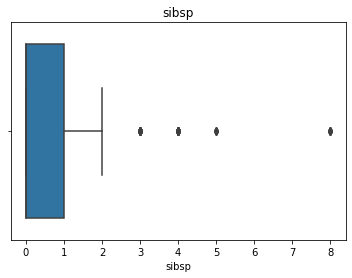

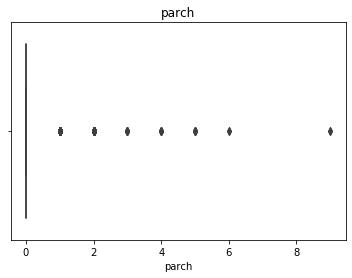

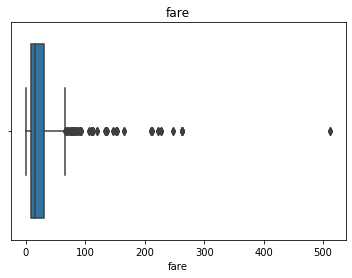

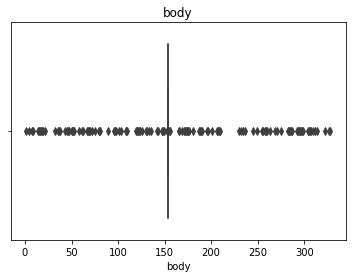

In [192]:
list = ["pclass","age","sibsp","parch","fare","body"]

for x in list:
    sns.boxplot(x=titanic[x])
    plt.title(x)
    plt.show()

In [195]:
index = titanic[(titanic["age"] > 55)|(titanic["age"] < 1)].index
titanic.drop(index, inplace=True)
#titanic["age"].value_counts() # it is observed that age has outliers more than 55 years and less than 
#1 like 0 is not acceptable as an age 

In [196]:
index = titanic[(titanic["fare"] > 60.0)].index
titanic.drop(index, inplace=True)
#titanic["age"].value_counts()

## Extra data visulization after removing the outliers: 

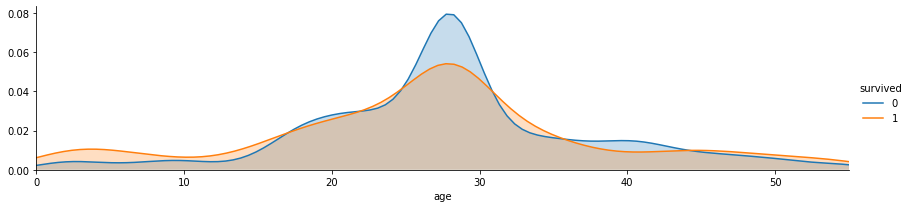

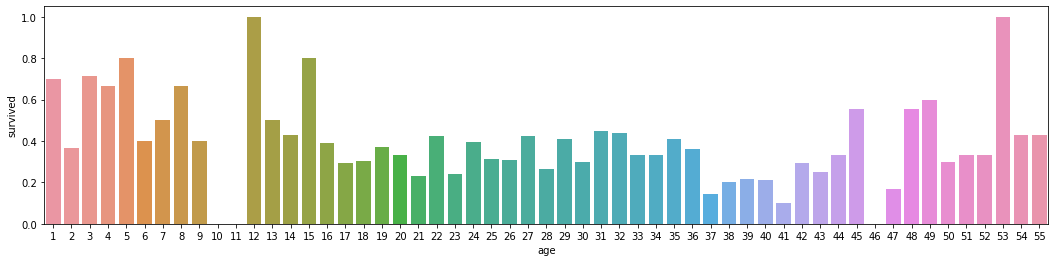

In [197]:
facet = sns.FacetGrid(titanic, hue="survived",aspect=4)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, titanic["age"].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic[["age", "survived"]].groupby(["age"],as_index=False).mean()
sns.barplot(x="age", y="survived", data=average_age)

# this graph shows the survived passengers across the a distribution of ages 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


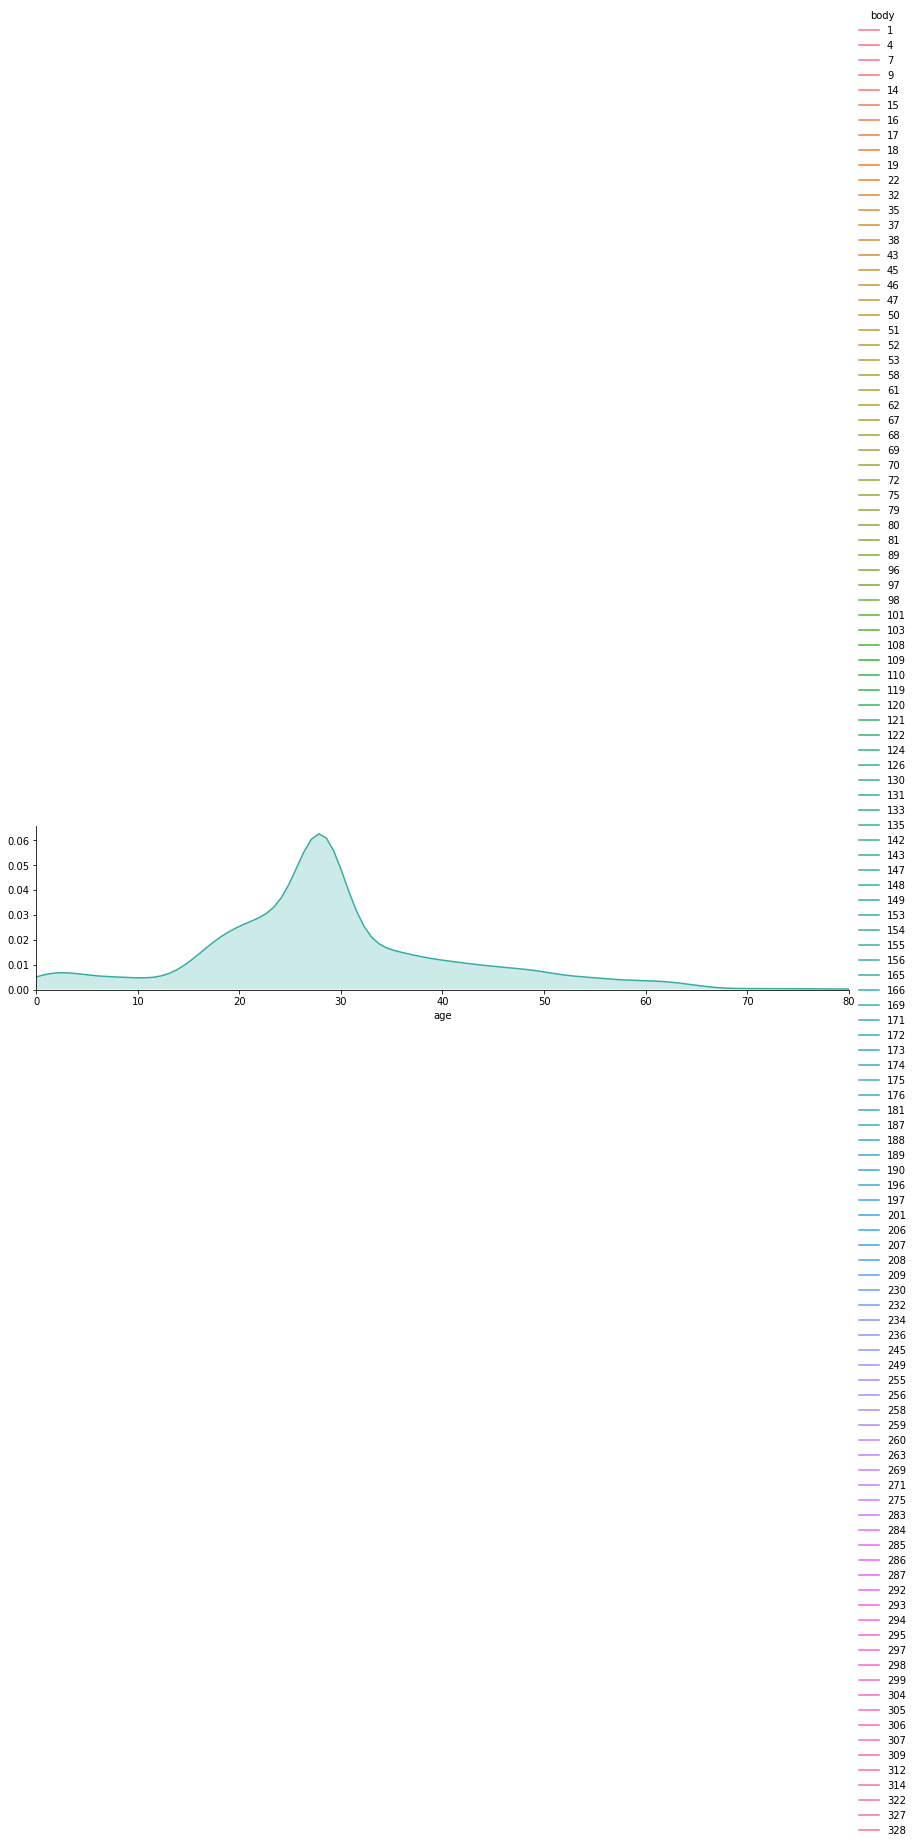

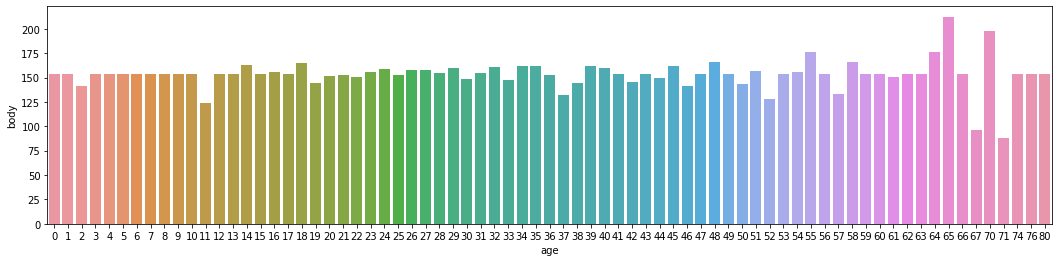

In [141]:
facet = sns.FacetGrid(titanic, hue="body",aspect=4)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, titanic["age"].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic[["age", "body"]].groupby(["age"],as_index=False).mean()
sns.barplot(x="age", y="body", data=average_age)

# this graph shows the dead passengers across the a distribution of ages 

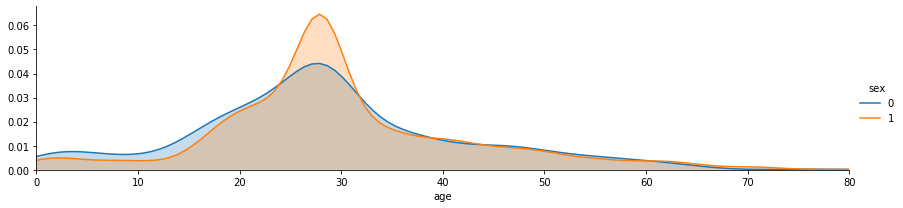

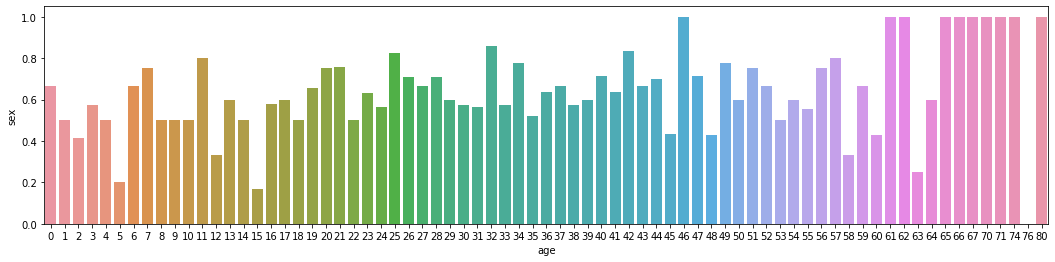

In [142]:
facet = sns.FacetGrid(titanic, hue="sex",aspect=4)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, titanic["age"].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic[["age", "sex"]].groupby(["age"],as_index=False).mean()
sns.barplot(x="age", y="sex", data=average_age)
# this graph shows passengers gender across the a distribution of ages 

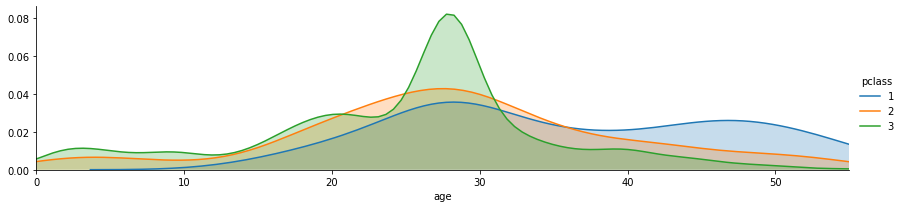

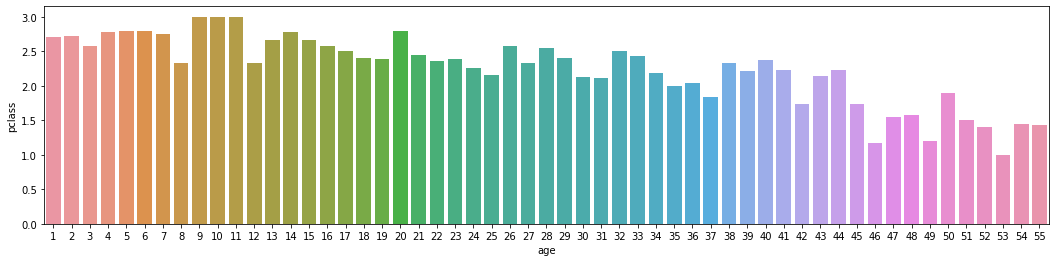

In [56]:
facet = sns.FacetGrid(titanic, hue="pclass",aspect=4)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, titanic["age"].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic[["age", "pclass"]].groupby(["age"],as_index=False).mean()
sns.barplot(x="age", y="pclass", data=average_age)
# this graph shows passengers class level across the a distribution of ages 

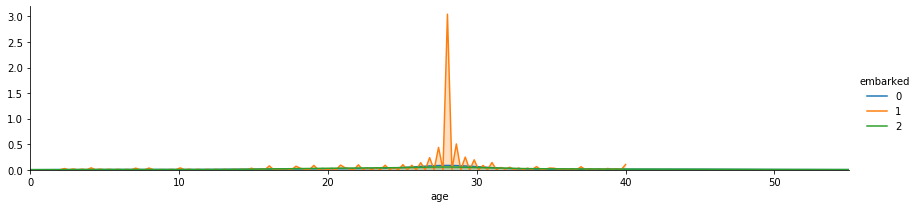

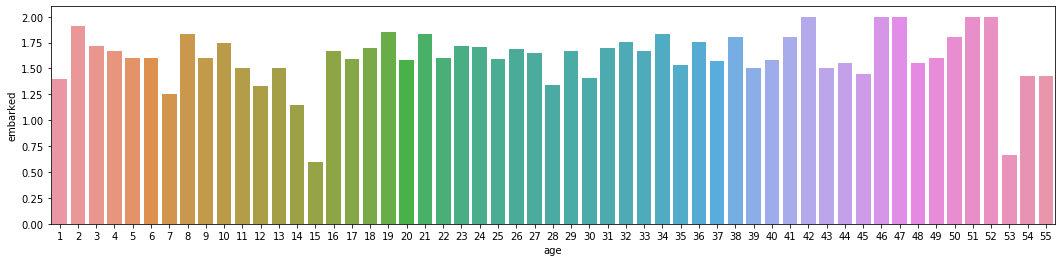

In [198]:
facet = sns.FacetGrid(titanic, hue="embarked",aspect=4)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, titanic["age"].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic[["age", "embarked"]].groupby(["age"],as_index=False).mean()
sns.barplot(x="age", y="embarked", data=average_age)
# this graph shows passengers embarked across the a distribution of ages 

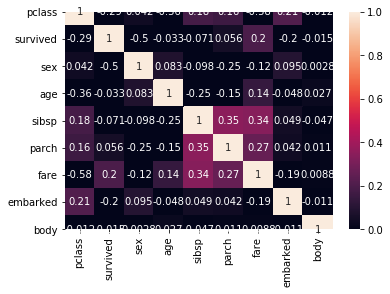

In [78]:
sns.heatmap(titanic.corr(),vmin=0, vmax=1,annot=True)
